<a href="https://colab.research.google.com/github/geoUFSC/learning/blob/main/Tens%C3%B5es_no_solo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exemplo: Tensões no solo homogêneo  

Neste exemplo, vamos utilizar as equações de tensões total e efetiva para o cálculo da tensões vertical e horizontal.

A seguir, apresenta-se uma imagem para melhor interpretação e a definição das variáveis:
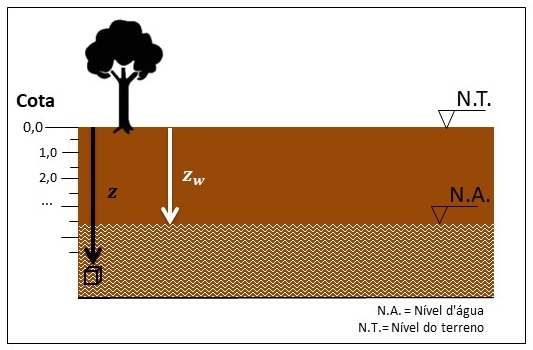


### Parâmetros

Para o cálculo das tesões no solo são necessários os seguintes parâmetros:

- **z**: Cota do elemento analisado (m);
- **zw**:  Cota de N.A. (m);
- **k0**:  Coeficiente de empuxo em repouso (adimensional);
- **gamma_n**:  Peso específico do solo, Yn (kN/m³);
- **gamma_w**:  Peso específico da água, Yw (kN/m³);
- **u**:  Poropressão (kN/m³);
- **sig_v**:  Tensão vertical total (kN/m²);
- **sig_vef**:  Tensão vertical efetiva (kN/m²);
- **sig_h**:  Tensão horizontal total (kN/m²);
- **sig_hef**:  Tensão horizotal efetiva(kN/m²).



## Pré-requisitos:
Vamos utilizar os pacotes:

- `numpy`: para funções numéricas
- `matplotlib`: para  visualizações estáticas
- `ipywidgets`: para ferramentas interativa

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, VBox, Output

## Definição da função cálculo de tensões:


In [ ]:
# Cálculos
def calcular_tensoes(z, gamma_n, zw, gamma_w, k0):
    sig_v = gamma_n * z
    u = np.where(z < zw, 0, (z - zw) * gamma_w)  # Calcula a poropressão considerando se a cota analisada está abaixo ou acima do NA
    sig_vef = sig_v - u
    sig_hef = k0 * sig_vef
    sig_h = sig_hef + u
    return sig_v, u, sig_vef, sig_hef, sig_h

### Verificação da função definida:

Vamos verificar a implementação para alguns valores esperados. Caso alguma verificação falhe, volte à célula anterior e corrija a função.

In [ ]:
# Função para verificar se os valores são iguais dentro de uma tolerância
def verifica_se_iguais(x, y):
    np.testing.assert_almost_equal(x, y, decimal=4)

# Primeiro conjunto de parâmetros
z = 40
gamma_n = 18
zw = 30
gamma_w = 10
k0 = 0.5
sig_v, u, sig_vef, sig_hef, sig_h = calcular_tensoes(z, gamma_n, zw, gamma_w, k0)
verifica_se_iguais(sig_h, 410)

# Segundo conjunto de parâmetros
z = 40
gamma_n = 18
zw = 0
gamma_w = 10
k0 = 0.5
sig_v, u, sig_vef, sig_hef, sig_h = calcular_tensoes(z, gamma_n, zw, gamma_w, k0)
verifica_se_iguais(sig_h, 560)

# Terceiro conjunto de parâmetros
z = 40
gamma_n = 18
zw = 40
gamma_w = 10
k0 = 0.5
sig_v, u, sig_vef, sig_hef, sig_h = calcular_tensoes(z, gamma_n, zw, gamma_w, k0)
verifica_se_iguais(sig_h, 360)

# Quarto conjunto de parâmetros
z = 10
gamma_n = 22
zw = 0
gamma_w = 10
k0 = 1
# Cálculo das tensões e impressão dos valores
sig_v, u, sig_vef, sig_hef, sig_h = calcular_tensoes(z, gamma_n, zw, gamma_w, k0)
verifica_se_iguais(sig_h, 220)

# Se todas as verificações passarem, imprime sucesso
print('Sucesso!')

Sucesso!


### Exercício:

Determine as tensões verticais e horizontais totais e efetivas atuantes em um elemento de solo situado na profundidade Z=10m. Adote k0 = 0.5; Yw= 10 kN/m³.

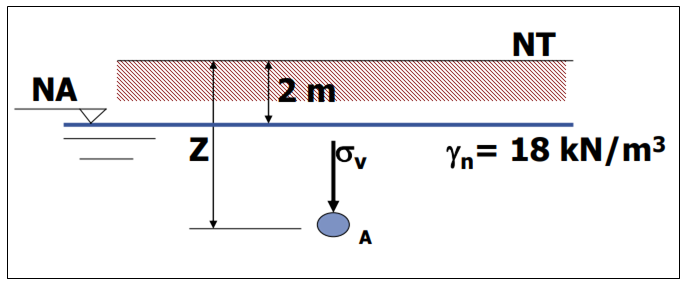

In [ ]:
#Solução manual
sig_v = 18 * 10
u = (10 - 2) * 10
sig_vef = sig_v - u
sig_hef = 0.5 * sig_vef
sig_h = sig_hef + u

print(f"Resultados cálculo manual:")
print(f"Tensão Vertical (sig_v): {int(sig_v)} kPa")
print(f"Poropressão (u): {int(u)} kPa")
print(f"Tensão Vertical Efetiva (sig_vef): {int(sig_vef)} kPa")
print(f"Tensão Horizontal Efetiva (sig_hef): {int(sig_hef)} kPa")
print(f"Tensão Horizontal (sig_h): {int(sig_h)} kPa")

#Solução usando a função definida anteriormente
sig_v, u, sig_vef, sig_hef, sig_h = calcular_tensoes(10, 18, 2, 10, 0.5)
print(f"_________________")
print(f"Resultados auomático:")
print(f"Tensão Vertical (sig_v): {int(sig_v)} kPa")
print(f"Poropressão (u): {int(u)} kPa")
print(f"Tensão Vertical Efetiva (sig_vef): {int(sig_vef)} kPa")
print(f"Tensão Horizontal Efetiva (sig_hef): {int(sig_hef)} kPa")
print(f"Tensão Horizontal (sig_h): {int(sig_h)} kPa")



Resultados cálculo manual:
Tensão Vertical (sig_v): 180 kPa
Poropressão (u): 80 kPa
Tensão Vertical Efetiva (sig_vef): 100 kPa
Tensão Horizontal Efetiva (sig_hef): 50 kPa
Tensão Horizontal (sig_h): 130 kPa
_________________
Resultados auomático:
Tensão Vertical (sig_v): 180 kPa
Poropressão (u): 80 kPa
Tensão Vertical Efetiva (sig_vef): 100 kPa
Tensão Horizontal Efetiva (sig_hef): 50 kPa
Tensão Horizontal (sig_h): 130 kPa


## Gráficos horizontal e vertical ao longo da profundidade

In [ ]:

# Função para atualizar o gráfico e imprimir os resultados
def atualizar_grafico(gamma_n, k0, zw, z_value):
    z = np.linspace(0, z_value, 500)  # Transforma z_value em um array de profundidades
    sig_v, u, sig_vef, sig_hef, sig_h = calcular_tensoes(z, gamma_n, zw, gamma_w, k0)

    # Limpar a área de saída antes de plotar
    out.clear_output(wait=True)

    # Plotar os gráficos
    with out:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

        # Gráfico 1: Tensão Vertical (sig_v) e Tensão Vertical Efetiva (sig_vef)
        ax1.plot(u, z, label='Poropressão (u)', color= 'blue')
        ax1.plot(sig_v, z, label='Tensão Vertical (sig_v)', color='coral')
        ax1.plot(sig_vef, z, label='Tensão Vertical Efetiva (sig_vef)', linestyle='--', color= 'green')

        # Adiciona linha tracejada entre poropressão e sig_v
        for i in range(len(z)):
            ax1.plot([u[i], sig_v[i]], [z[i], z[i]], linestyle='--', alpha=0.5, linewidth=0.5, color='green')

        ax1.set_xlabel('Tensão (kN/m²)')
        ax1.xaxis.set_label_position('top')
        ax1.xaxis.tick_top()
        ax1.set_ylabel('Profundidade (m)')
        ax1.set_title('Tensões Verticais')
        ax1.legend()
        ax1.set_xlim([0, 1000])  # Define o limite máximo do eixo x para 1000
        ax1.set_ylim(ax1.get_ylim()[::-1])
        ax1.set_xlim(left=0)
        ax1.grid(True)
        # Gráfico 2: Tensão Horizontal (sig_h) e Tensão Horizontal Efetiva (sig_hef)
        ax2.plot(u, z, label='Poropressão (u)', color= 'blue')
        ax2.plot(sig_h, z, label='Tensão Horizontal (sig_h)',color='coral')
        ax2.plot(sig_hef, z, label='Tensão Horizontal Efetiva (sig_hef)', linestyle='--', color= 'green')

        # Adiciona linha tracejada entre poropressão e sig_h
        for i in range(len(z)):
            ax2.plot([u[i], sig_h[i]], [z[i], z[i]], linestyle='--', alpha=0.5, linewidth=0.5, color='green')  # linha tracejada preta

        ax2.set_xlabel('Tensão (kN/m²)')
        ax2.xaxis.set_label_position('top')
        ax2.xaxis.tick_top()
        ax2.set_ylabel('Profundidade (m)')
        ax2.set_title('Tensões Horizontais')
        ax2.legend()
        ax2.set_xlim([0, 1000])  # Define o limite máximo do eixo x para 1000
        ax2.set_ylim(ax2.get_ylim()[::-1])
        ax2.set_xlim(left=0)
        ax2.grid(True)

        plt.tight_layout()
        plt.show()

      # Impressão dos resultados
        print(f'Resultados:')
        print(f'Tensão Vertical (sig_v): {int(sig_v[-1])} kPa')
        print(f'Poropressão (u): {int(u[-1])} kPa')
        print(f'Tensão Vertical Efetiva (sig_vef): {int(sig_vef[-1])} kPa')
        print(f'Tensão Horizontal Efetiva (sig_hef): {int(sig_hef[-1])} kPa')
        print(f'Tensão Horizontal (sig_h): {int(sig_h[-1])} kPa')
# Dados de exemplo
gamma_w = 10

# Cria os sliders para os valores de gamma_n, k0 e zw e uma entrada para z
slider_gamma_n = widgets.FloatSlider(min=14, max=22, step=0.1, value=18, description='gamma_n')
slider_k0 = widgets.FloatSlider(min=0.3, max=1, step=0.01, value=0.5, description='k0')
slider_zw = widgets.FloatSlider(min=0, max=40, step=1, value=0, description='zw')
entrada_z = widgets.FloatText(value=40, description='z', continuous_update=False)

# Área de saída para mensagens e resultados
out = Output()

# Usa o interator do ipywidgets para atualizar o gráfico quando os sliders forem movidos
ui = VBox([slider_gamma_n, slider_k0, slider_zw, entrada_z, out])
widgets.interactive_output(atualizar_grafico, {'gamma_n': slider_gamma_n, 'k0': slider_k0, 'zw': slider_zw, 'z_value': entrada_z})

display(ui)


---
---
# **PROJETO: REPOSITÓRIO PYTHON PARA GEOTECNIA**
Este notebook faz parte do projeto de extensão da **Universidade Federal de Santa Catarina** (UFSC) denominado **"Repositório Python para Geotecnia"**, cujo objetivo é desenvolver e compartilhar scripts e funções úteis para a área de geotecnia.

### Equipe 2024:
- Prof. Stephanie Thiesen* (coordenadora)
 - Bárbara Liskoski (voluntária)
 - Célio de Sousa Lopes (bolsista)
 - Leonardo Taveira de Paula (voluntário)

*Para sugestões, entre em contato pelo e-mail: `stephanie.thiesen@ufsc.br`

**Isenção de Responsabilidade:**
Os autores deste projeto não se responsabilizam por quaisquer usos indevidos, imprecisões ou danos resultantes da aplicação dos scripts e funções contidos neste repositório. O uso dos materiais é de responsabilidade exclusiva do usuário.

---
---